<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

## **Contexto**
La finca raíz es un negocio  lucrativo en el que participan una gran cantidad de actores, desde constructoras, inmobiliarias hasta personas naturales en busqueda de vender o comprar sus inmuebles.

**Descripción del dataset**: El dataset housing está conformado por 13 variables y 545 observaciones. En este dataset se resumen algunas características de viviendas y el precio de las viviendas. 

**Problema de negocio:** Una consultora internacional lo ha contratado para desarrollar un análisis descriptivo y exploratorio que permita entender la relación entre diversos atributos de viviendas con el precio para una ciudad del sureste de India. Su trabajo es encontrar las variables que mejor expliquen el precio de las viviendas.



## **Detección**

|Variable|Descripción|Tipología|
|---|---|---|
|price| Precio (USD)|Cuantitativa continua|
|area|Área del predio (pies cuadrados)|Cuantitativa continua|
|bedrooms|Cantidad de habitaciones|Cuantitativa discreta|
|bathrooms|Cantidad de baños|Cuantitativa discreta|
|stories|Cantidad de pisos-niveles|Cuantitativa discreta|
|mainroad|Ubicación sobre una calle principal|Cualitativa binaria|
|guestroom|Cuarto para invitados|Cualitativa binaria|
|basement|Sotano|Cualitativa binaria|
|hotwaterheating|Calentador de agua|Cualitativa binaria|
|airconditioning|Aire acondicionado|Cualitativa binaria|
|parking|Cantidad de parqueaderos|Cuantitativa discreta|
|prefarea|Barrio o zona privilegiada de la ciudad|Cualitativa binaria|
|furnishing status|Estado de amoblamiento|Cualitativa ordinal|

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette = 'crest')

## Carga de dataset

In [30]:
housing = pd.read_csv('https://github.com/HarryVargas96/UdeCataluna/raw/main/Housing.csv',
                      dtype = {
                          'mainroad':'category',
                          'guestroom':'category',
                          'basement':'category',
                          'hotwaterheating':'category',
                          'airconditioning':'category',
                          'prefarea':'category',
                          'furnishingstatus':'category'
                      })
housing.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
326,3990000,4100,4,1,1,no,no,yes,no,no,0,no,unfurnished
299,4200000,7000,3,1,1,yes,no,no,no,no,3,no,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
137,5740000,4640,4,1,2,yes,no,no,no,no,1,no,semi-furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished


In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 29.8 KB


In [15]:
housing['furnishingstatus']

0           furnished
1           furnished
2      semi-furnished
3           furnished
4           furnished
            ...      
540       unfurnished
541    semi-furnished
542       unfurnished
543         furnished
544       unfurnished
Name: furnishingstatus, Length: 545, dtype: category
Categories (3, object): ['furnished', 'semi-furnished', 'unfurnished']

In [16]:
housing['furnishingstatus'].cat.categories

Index(['furnished', 'semi-furnished', 'unfurnished'], dtype='object')

In [20]:
housing['furnishingstatus'] = housing['furnishingstatus'].cat.set_categories(['unfurnished', 'semi-furnished','furnished' ])

In [22]:
housing['furnishingstatus'].cat.codes

0      2
1      2
2      1
3      2
4      2
      ..
540    0
541    1
542    0
543    2
544    0
Length: 545, dtype: int8

In [23]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [31]:
housing['price'] = housing['price'] / 1e6
housing['area'] = housing['area']*0.092903
housing['price_per_area'] = housing['price']* 1e6 / housing['area']

In [32]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking,price_per_area
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729,478.500737,2.965138,1.286239,1.805505,0.693578,10692.087213
std,1.870440,201.612611,0.738064,0.502470,0.867492,0.861586,3730.095094
min,1.750000,153.289950,1.000000,1.000000,1.000000,0.000000,2910.514731
25%,3.430000,334.450800,2.000000,1.000000,1.000000,0.000000,8023.103348
50%,4.340000,427.353800,3.000000,1.000000,2.000000,0.000000,10251.347668
75%,5.740000,590.863080,3.000000,2.000000,2.000000,1.000000,12751.099368
max,13.300000,1505.028600,6.000000,4.000000,4.000000,3.000000,28416.735735


In [33]:
housing.describe(include = 'category')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


## Análisis univariado

### Numéricas

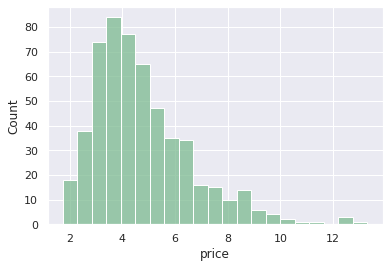

In [80]:
sns.histplot( data = housing, x = 'price')

Text(0, 0.5, 'Frecuencia')

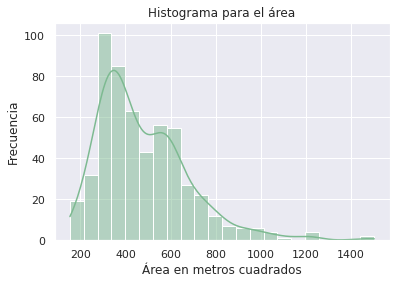

In [81]:
sns.histplot( data = housing, x = 'area', kde = True)
plt.title('Histograma para el área')
plt.xlabel('Área en metros cuadrados')
plt.ylabel('Frecuencia')

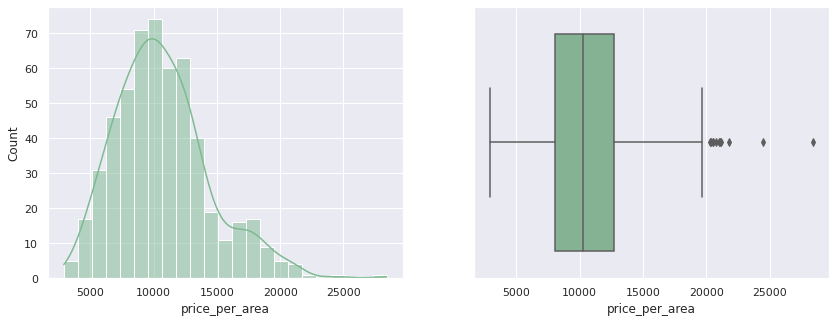

In [82]:
fig, ax = plt.subplots(1,2,figsize = (14,5))

sns.histplot( data = housing, x = 'price_per_area', kde = True, ax = ax[0])
sns.boxplot( data = housing, x = 'price_per_area')
# ax[0].hist(housing['price_per_area'])

In [57]:
housing[housing['price_per_area'] > 20000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_area
13,9.2400,325.160500,4,2,2,yes,no,no,yes,no,2,no,furnished,28416.735735
18,8.8900,427.353800,3,2,2,yes,yes,no,no,yes,2,no,furnished,20802.435827
20,8.7500,401.340960,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished,21801.911273
23,8.6450,423.637680,3,2,2,yes,yes,yes,no,yes,1,no,furnished,20406.588951
108,6.1075,301.005720,4,1,3,yes,no,no,no,no,1,no,semi-furnished,20290.312091
157,5.4950,261.707751,4,2,2,no,yes,yes,no,no,1,no,furnished,20996.703304
271,4.3400,176.980215,5,1,2,no,no,yes,no,no,0,no,semi-furnished,24522.515130
282,4.2700,202.064025,3,1,2,no,yes,yes,no,yes,0,no,unfurnished,21131.915986
302,4.2000,199.276935,3,1,3,yes,no,no,no,no,1,yes,unfurnished,21076.197303
345,3.8500,187.199545,3,1,2,yes,no,yes,no,no,0,yes,semi-furnished,20566.289304


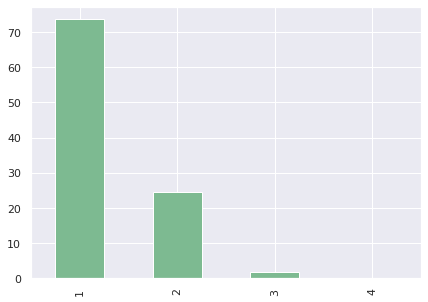

In [83]:
fig = plt.figure(figsize= (7,5), dpi = None)
(housing['bathrooms'].value_counts(normalize = True)*100).plot(kind = 'bar')

In [100]:
housing['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

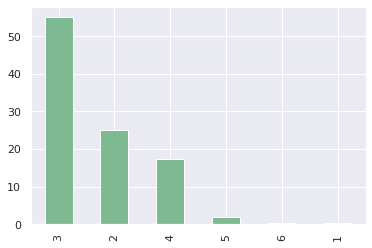

In [84]:
(housing['bedrooms'].value_counts(normalize = True)*100).plot(kind = 'bar')

In [70]:
housing['stories'].value_counts(normalize = True)*100

2    43.669725
1    41.651376
4     7.522936
3     7.155963
Name: stories, dtype: float64

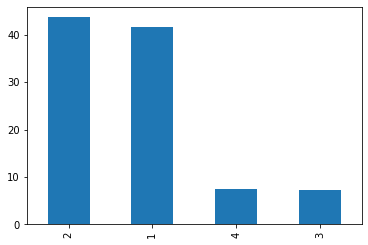

In [69]:
(housing['stories'].value_counts(normalize = True)*100).plot(kind = 'bar')

### Cualitativas

In [72]:
housing['prefarea'].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

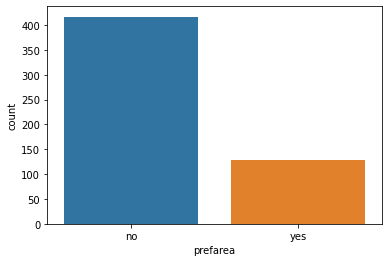

In [71]:
sns.countplot(data = housing, x = 'prefarea' )

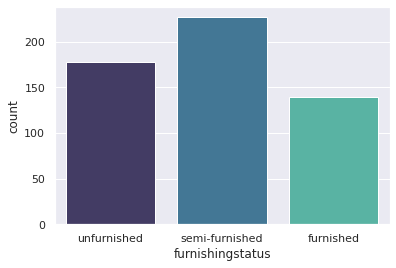

In [86]:
sns.countplot(data = housing, x = 'furnishingstatus', order = ['unfurnished','semi-furnished','furnished'], palette = 'mako')  

In [87]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'price_per_area'],
      dtype='object')

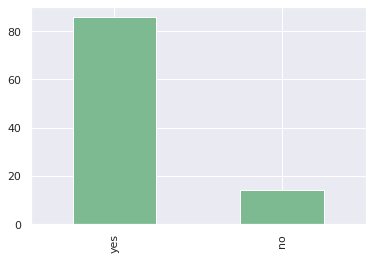

In [90]:
(housing['mainroad'].value_counts(normalize = True)*100).plot(kind = 'bar')

## Análisis bivariado

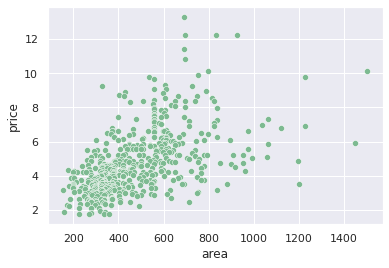

In [92]:
sns.scatterplot(data = housing, x = 'area', y = 'price')

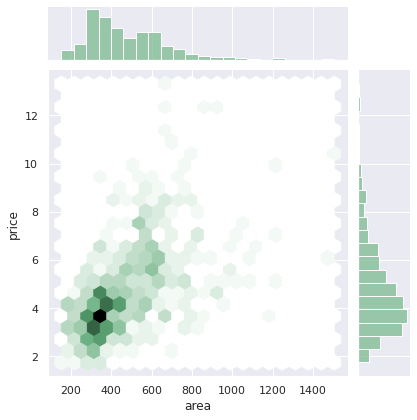

In [93]:
sns.jointplot(data=housing, x='area', y='price', kind="hex")

In [ ]:
# price y numero de habitaciones
# price por area y numero de habitaciones

In [96]:
housing.groupby('bedrooms')['price'].mean()

bedrooms
1    2.712500
2    3.632022
3    4.954598
4    5.729758
5    5.819800
6    4.791500
Name: price, dtype: float64

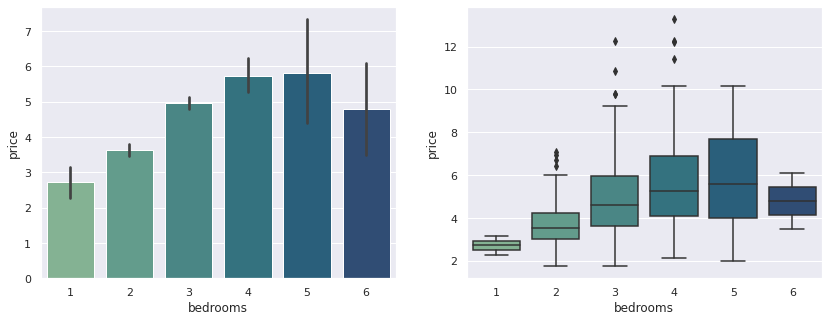

In [104]:
fig, ax = plt.subplots(1,2,figsize = (14,5))

sns.barplot(data = housing, x = 'bedrooms', y = 'price', ax = ax[0])
sns.boxplot(data = housing, x = 'bedrooms', y = 'price', ax = ax[1])

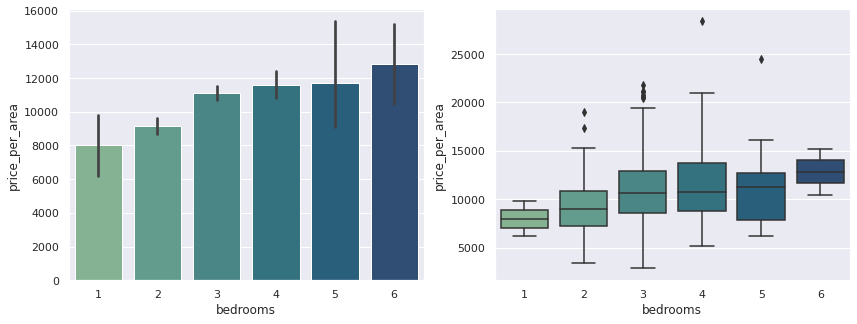

In [105]:
fig, ax = plt.subplots(1,2,figsize = (14,5))

sns.barplot(data = housing, x = 'bedrooms', y = 'price_per_area', ax = ax[0])
sns.boxplot(data = housing, x = 'bedrooms', y = 'price_per_area', ax = ax[1])

Area preferencial, precio promedio cambia?

AL menos el valor de la media y mediana son mayores para áreas preferenciales

precio por area cambia?

In [108]:
housing.groupby('prefarea')['price'].median()

prefarea
no     4.0950
yes    5.5825
Name: price, dtype: float64

In [110]:
housing.groupby('prefarea')['price_per_area'].mean()

prefarea
no     10468.767166
yes    11419.622054
Name: price_per_area, dtype: float64

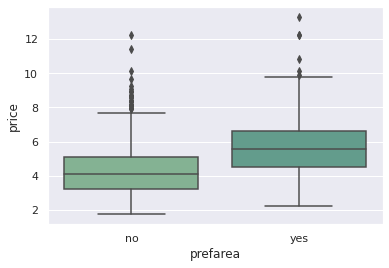

In [111]:
sns.boxplot(data = housing, x = 'prefarea',y = 'price')

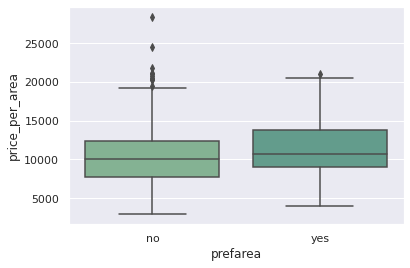

In [112]:
sns.boxplot(data = housing, x = 'prefarea',y = 'price_per_area')

In [119]:
subset = housing.loc[(housing['prefarea'] == 'no') & (housing['price_per_area'] >= 18000)]

In [116]:
housing.loc[(housing['prefarea'] == 'no') & (housing['price_per_area'] >= 18000)].describe()

,price,area,bedrooms,bathrooms,stories,parking,price_per_area
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,5.987139,293.945092,3.277778,1.555556,2.000000,0.722222,20404.641836
std,1.854233,82.399610,0.574513,0.615699,0.342997,0.826442,2563.916088
min,3.150000,153.289950,3.000000,1.000000,1.000000,0.000000,18037.712192
25%,4.651500,242.709088,3.000000,1.000000,2.000000,0.000000,18658.495770
50%,5.477500,285.676725,3.000000,1.500000,2.000000,0.500000,19867.401898
75%,7.218750,343.276585,3.000000,2.000000,2.000000,1.000000,20948.136434
max,9.240000,427.353800,5.000000,3.000000,3.000000,2.000000,28416.735735


In [118]:
housing.describe(include = 'category')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [117]:
housing.loc[(housing['prefarea'] == 'no') & (housing['price_per_area'] >= 18000)].describe(include = 'category')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,18,18,18,18,18,18,18
unique,2,2,2,2,2,1,3
top,yes,no,yes,no,no,no,furnished
freq,12,12,13,15,13,18,7


Text(0.5, 1.0, 'Distribución subset')

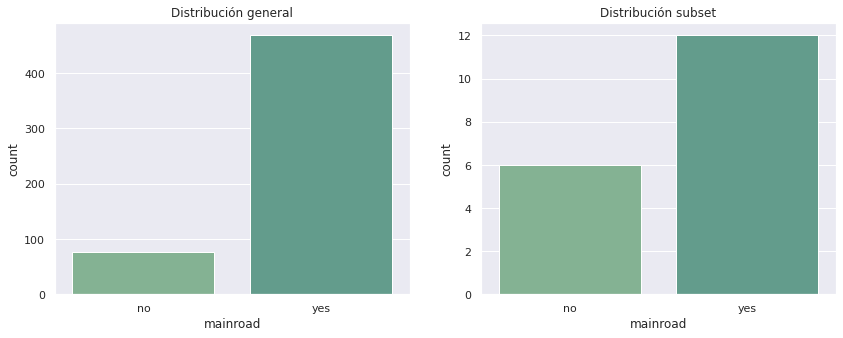

In [121]:
fig, ax = plt.subplots (1,2, figsize = (14,5))

sns.countplot(data = housing, x = 'mainroad', ax = ax[0])
ax[0].set_title('Distribución general')

sns.countplot(data = subset, x = 'mainroad', ax = ax[1])
ax[1].set_title('Distribución subset')



Text(0.5, 1.0, 'Distribución subset')

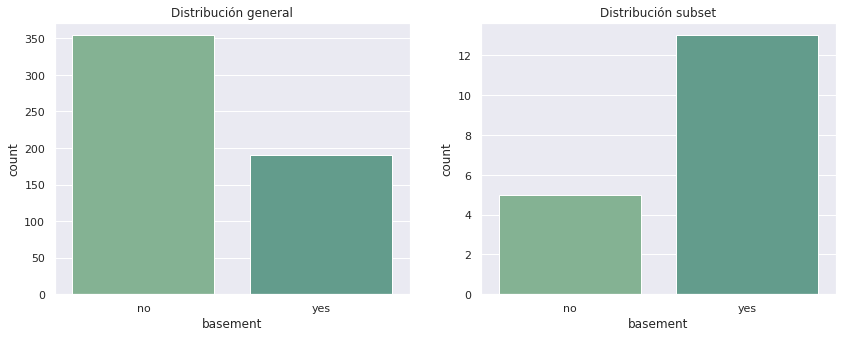

In [122]:
fig, ax = plt.subplots (1,2, figsize = (14,5))

sns.countplot(data = housing, x = 'basement', ax = ax[0])
ax[0].set_title('Distribución general')

sns.countplot(data = subset, x = 'basement', ax = ax[1])
ax[1].set_title('Distribución subset')

Text(0.5, 1.0, 'Distribución subset')

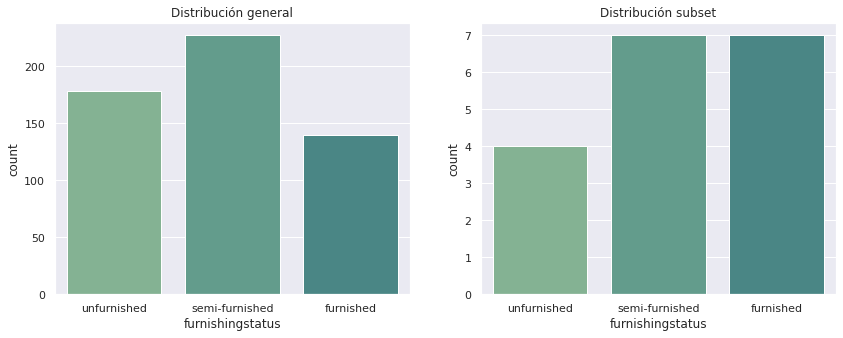

In [124]:
fig, ax = plt.subplots (1,2, figsize = (14,5))

sns.countplot(data = housing, x = 'furnishingstatus', ax = ax[0], order = ['unfurnished','semi-furnished','furnished'])
ax[0].set_title('Distribución general')

sns.countplot(data = subset, x = 'furnishingstatus', ax = ax[1], order = ['unfurnished','semi-furnished','furnished'])
ax[1].set_title('Distribución subset')